### student admission predection using deep learning

Load packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

Load the data

In [81]:
data = pd.read_csv (r'adm.csv')   
print (data.head)

<bound method NDFrame.head of      Serial_No  GRE_Score  TOEFL_Score  University_Rating  SOP  LOR   CGPA  \
0            1        337          118                  4  4.5   4.5  9.65   
1            2        324          107                  4  4.0   4.5  8.87   
2            3        316          104                  3  3.0   3.5  8.00   
3            4        322          110                  3  3.5   2.5  8.67   
4            5        314          103                  2  2.0   3.0  8.21   
..         ...        ...          ...                ...  ...   ...   ...   
395        396        324          110                  3  3.5   3.5  9.04   
396        397        325          107                  3  3.0   3.5  9.11   
397        398        330          116                  4  5.0   4.5  9.45   
398        399        312          103                  3  3.5   4.0  8.78   
399        400        333          117                  4  5.0   4.0  9.66   

     Rese  adm  
0       1  1.0  

In [82]:
data.columns

Index(['Serial_No', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR ', 'CGPA', 'Rese', 'adm'],
      dtype='object')

In [84]:
data.dtypes

Serial_No              int64
GRE_Score              int64
TOEFL_Score            int64
University_Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Rese                   int64
adm                  float64
dtype: object

convert the data type of the dataset

In [85]:
data=data.astype(np.float64)
data.dtypes

Serial_No            float64
GRE_Score            float64
TOEFL_Score          float64
University_Rating    float64
SOP                  float64
LOR                  float64
CGPA                 float64
Rese                 float64
adm                  float64
dtype: object

Check if the data has missing values

In [86]:
data.isna().sum()

Serial_No            0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Rese                 0
adm                  0
dtype: int64

Split the dataset into test and train

In [87]:
train_dataset= data.sample(frac=0.8,random_state=0)
test_dataset= data.drop(train_dataset.index)

In [88]:
train_dataset

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Rese,adm
132,133.0,309.0,105.0,5.0,3.5,3.5,8.56,0.0,1.0
309,310.0,308.0,110.0,4.0,3.5,3.0,8.60,0.0,1.0
341,342.0,326.0,110.0,3.0,3.5,3.5,8.76,1.0,1.0
196,197.0,306.0,105.0,2.0,3.0,2.5,8.26,0.0,1.0
246,247.0,316.0,105.0,3.0,3.0,3.5,8.73,0.0,1.0
...,...,...,...,...,...,...,...,...,...
279,280.0,304.0,102.0,2.0,3.0,4.0,8.73,0.0,0.0
227,228.0,312.0,110.0,2.0,3.5,3.0,8.53,0.0,0.0
148,149.0,339.0,116.0,4.0,4.0,3.5,9.80,1.0,1.0
143,144.0,340.0,120.0,4.0,4.5,4.0,9.92,1.0,1.0


In [89]:
print(train_dataset.shape)
print(test_dataset.shape)

(320, 9)
(80, 9)


In [67]:
data.adm

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
395    1.0
396    1.0
397    1.0
398    1.0
399    1.0
Name: adm, Length: 400, dtype: float64

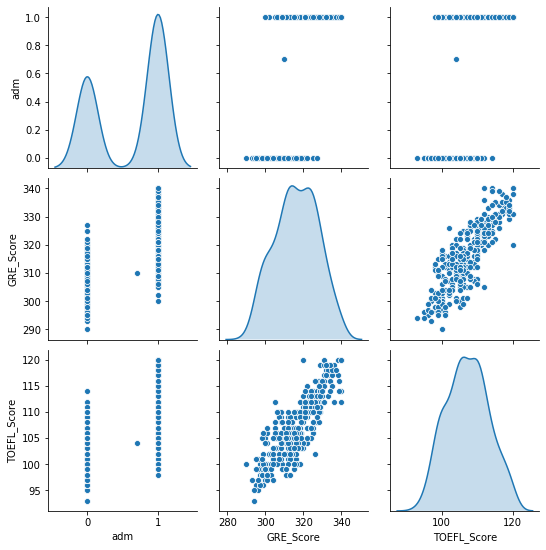

In [69]:
sns.pairplot(train_dataset[["adm","GRE_Score", "TOEFL_Score"]], diag_kind="kde")


In [90]:
train_labels = train_dataset.pop('adm')
test_labels = test_dataset.pop('adm')

In [110]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=[len(train_dataset.keys())]),
    keras.layers.Dense(16, activation=tf.nn.relu),
	keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [115]:

model.fit(train_dataset, train_labels, epochs=50)


Train on 320 samples
Epoch 1/50
320/320 [==============================] - 0s 112us/sample - loss: 0.2604 - accuracy: 0.9031
Epoch 2/50
320/320 [==============================] - 0s 112us/sample - loss: 0.2700 - accuracy: 0.8875
Epoch 3/50
320/320 [==============================] - 0s 94us/sample - loss: 0.2776 - accuracy: 0.8750
Epoch 4/50
320/320 [==============================] - 0s 119us/sample - loss: 0.2773 - accuracy: 0.8875
Epoch 5/50
320/320 [==============================] - 0s 103us/sample - loss: 0.3063 - accuracy: 0.8469
Epoch 6/50
320/320 [==============================] - 0s 116us/sample - loss: 0.2650 - accuracy: 0.8906
Epoch 7/50
320/320 [==============================] - 0s 103us/sample - loss: 0.2712 - accuracy: 0.8969
Epoch 8/50
320/320 [==============================] - 0s 109us/sample - loss: 0.2727 - accuracy: 0.8844
Epoch 9/50
320/320 [==============================] - 0s 103us/sample - loss: 0.2735 - accuracy: 0.8750
Epoch 10/50
320/320 [=======================

In [116]:
test_loss, test_acc = model.evaluate(test_dataset, test_labels)
print('Test accuracy:', test_acc)

80/80 [==============================] - 0s 212us/sample - loss: 0.5615 - accuracy: 0.8000
Test accuracy: 0.8


In [122]:
test_predictions = model.predict(test_dataset)

test_predictions

array([[9.99993801e-01],
       [9.84856665e-01],
       [4.59951861e-03],
       [4.35287029e-01],
       [9.18854356e-01],
       [1.28337741e-02],
       [3.04404289e-01],
       [1.26432821e-01],
       [9.74497736e-01],
       [8.73532057e-01],
       [9.09109861e-02],
       [9.97407496e-01],
       [9.97163951e-01],
       [9.96980608e-01],
       [9.92065489e-01],
       [2.36999750e-01],
       [7.99710035e-01],
       [4.79027122e-01],
       [9.55405474e-01],
       [8.91558588e-01],
       [8.23454440e-01],
       [2.65888959e-01],
       [3.77837718e-01],
       [9.66613114e-01],
       [4.82385695e-01],
       [6.85420930e-01],
       [9.88633752e-01],
       [9.85616446e-01],
       [9.99655843e-01],
       [8.71963501e-01],
       [9.97944891e-01],
       [9.96945798e-01],
       [9.97845411e-01],
       [9.53131437e-01],
       [9.77933705e-01],
       [9.98273373e-01],
       [9.99794781e-01],
       [9.99751866e-01],
       [8.78305137e-01],
       [6.84911728e-01],


Conclusion: In this code, we build model based on Keras to classify the student admission